In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import tensorflow_hub as hub
import tensorflow_text

from transformers import BertTokenizer, BertModel
import torch

C:\Users\Brad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
print(type(last_hidden_states))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<class 'torch.Tensor'>


In [3]:
last_hidden_states = last_hidden_states.detach().numpy()

In [4]:
print(last_hidden_states[0][0].shape)

(768,)


In [2]:
from datasets import load_dataset

dataset = load_dataset("xnli", "all_languages")

Reusing dataset xnli (C:\Users\Brad\.cache\huggingface\datasets\xnli\all_languages\1.1.0\818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd)
100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


In [3]:
xnli = dataset["train"]["premise"][:100]

In [4]:
xnli[0]

{'ar': '- و قد ال كريم المفاهيمية اثنان اساسيين - المنتج والجغرافيا .',
 'bg': 'концептуално крем краде има две основни измерения - продукт и география .',
 'de': 'Konzeptionell cream abschöpfen hat zwei grundlegende Dimensionen - Produkt und Geographie .',
 'el': 'Η εννοιολογικά κρέμα κρέμα έχει δύο βασικές διαστάσεις - προϊόν και γεωγραφία .',
 'en': 'Conceptually cream skimming has two basic dimensions - product and geography .',
 'es': 'Los robando de crema conceptualmente tienen dos dimensiones básicas : producto y geografía .',
 'fr': "L' écrémage conceptuel de la crème a deux dimensions fondamentales : le produit et la géographie .",
 'hi': 'Conceptually क ् रीम एंजलिस में दो मूल आयाम हैं - उत ् पाद और भूगोल ।',
 'ru': 'Концептуально крем крем имеет два основных измерения - продукт и география .',
 'sw': 'Sakata cream ya conceptually ina vipimo viwili vya msingi - bidhaa na geography .',
 'th': 'ท่า ครีม ยักยอก มี สอง มิติ พื้นฐาน   -   สินค้า และ ภูมิศาสตร์',
 'tr': 'Kavramsal 

In [5]:
# new_models in sentence transformers org
miniLM = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
distil = "sentence-transformers/distiluse-base-multilingual-cased-v2"
xlm = "sentence-transformers/paraphrase-xlm-r-multilingual-v1"


In [6]:
from sentence_transformers import SentenceTransformer
miniLM_model = SentenceTransformer(miniLM)
distil_model = SentenceTransformer(distil)
xlm_model = SentenceTransformer(xlm)

In [23]:
for i in xnli[0]:
    print(i + " " + xnli[0][i])

ar - و قد ال كريم المفاهيمية اثنان اساسيين - المنتج والجغرافيا .
bg концептуално крем краде има две основни измерения - продукт и география .
de Konzeptionell cream abschöpfen hat zwei grundlegende Dimensionen - Produkt und Geographie .
el Η εννοιολογικά κρέμα κρέμα έχει δύο βασικές διαστάσεις - προϊόν και γεωγραφία .
en Conceptually cream skimming has two basic dimensions - product and geography .
es Los robando de crema conceptualmente tienen dos dimensiones básicas : producto y geografía .
fr L' écrémage conceptuel de la crème a deux dimensions fondamentales : le produit et la géographie .
hi Conceptually क ् रीम एंजलिस में दो मूल आयाम हैं - उत ् पाद और भूगोल ।
ru Концептуально крем крем имеет два основных измерения - продукт и география .
sw Sakata cream ya conceptually ina vipimo viwili vya msingi - bidhaa na geography .
th ท่า ครีม ยักยอก มี สอง มิติ พื้นฐาน   -   สินค้า และ ภูมิศาสตร์
tr Kavramsal krem kaymağını iki temel boyutu vardır - ürün ve coğrafya .
ur ارضیات کی ناپیدی او

In [34]:
# loop through the data and get word embeddings
embed_list = []

for idx, i in enumerate(xnli[0]):
    new_entry = {}
    for i in xnli[idx]:
        lang_id = i
        lang_value = xnli[idx][i]

        embeddings = miniLM_model.encode(lang_value)

        new_entry[lang_id] = embeddings
    embed_list.append(new_entry)

In [48]:
test1 = [0, 1, 2, 2,3]
test2 = [2, 4, 5, 5,4]
t3 = np.array(test1) - np.array(test2)
print(t3 ** 2)

[4 9 9 9 1]


In [ ]:
def listAvg(input_list):
    return None

In [57]:
# within cluster sum of squares

diff_sums = []
def wcss():
    vectors = list(embed_list[0].values())

    for i in range(15, 16):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(vectors)
        y_kmeans = kmeans.predict(vectors)
        print(y_kmeans)

        means = []
        for m in range(0, i):
            sublist = []
            for idx, y in enumerate(y_kmeans):
                if y == m:
                    sublist.append(vectors[idx])
            means.append(sublist)
        
        avgs = []
        for a in means:
            # average is wrong
            sub_avg = np.average(a)
            diff = (a[0] - sub_avg) ** 2
            print(diff)
            avgs.append(sub_avg)
        
        sum = np.zeros((384,))
        for idx, v in enumerate(vectors):
            avg_group = y_kmeans[idx]
            avg = avgs[avg_group]
            diff = (v - avg) ** 2
            sum = sum + diff

        diff_sums.append(np.sum(sum))

wcss()

[ 5  4  1  9 11 10 14  7  6  2 12 13  0  3  8]
-3.4593977e-05
[3.79584841e-02 2.73586921e-02 2.86915656e-02 1.82760004e-02
 1.78451696e-03 5.13425516e-03 5.99952109e-05 1.36155877e-02
 1.92884654e-02 9.13582684e-04 1.29000647e-02 3.25073004e-02
 2.78312955e-02 5.53273503e-03 1.36003667e-03 6.60901377e-03
 1.02308411e-02 3.99349490e-03 2.01376504e-03 1.84491985e-02
 3.21072079e-02 3.87230981e-03 4.86317258e-05 1.04675228e-02
 6.84220344e-03 2.05269083e-03 4.04699072e-02 2.15971624e-04
 4.19764780e-03 7.40826968e-03 4.76984819e-03 8.70954152e-03
 1.11866997e-04 5.04903588e-03 2.50809197e-03 1.97998323e-02
 1.12481768e-09 1.42295263e-03 5.76662878e-03 5.13182115e-03
 2.12127436e-03 3.76520655e-03 6.78335503e-02 5.54303546e-03
 2.42749229e-03 9.61558893e-03 8.78893677e-03 1.11249252e-03
 1.83313116e-02 2.59701759e-02 1.27587486e-02 9.59935319e-03
 7.87863508e-02 5.92846423e-03 3.91281117e-03 1.78069305e-02
 2.10838225e-02 4.14133654e-04 1.01198778e-02 2.01628334e-03
 2.02995352e-02 3.31892

In [ ]:
np.average([])

In [30]:
difflist = (embed_list[0]["de"] - embed_list[0]["tr"]) ** 2
sum = 0
for d in difflist:
    sum = sum + d
print(sum * 15)

38.573602817690265


In [38]:
diff_sums

[212.5430315042787]

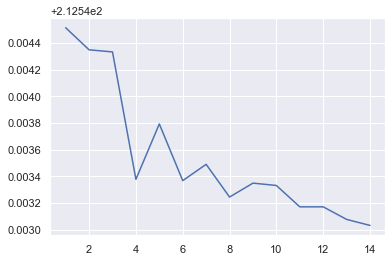

In [12]:
import matplotlib.pyplot as plt

x_values = [i for i in range(1, 15)]
y_values = diff_sums
plt.plot(x_values, y_values)  #draw the plot
plt.show()   #show the plot

In [24]:
# cluster the sentence blocks using k-means and wss
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
vectors = list(embed_list[0].values())
kmeans.fit(vectors)
y_kmeans = kmeans.predict(vectors)

In [49]:
np.shape(vectors[0])

(384,)

In [32]:
y_kmeans

array([1, 3, 0, 0, 2, 3, 0, 1, 0, 4, 1, 0, 1, 2, 0])

In [44]:
means = []
for m in range(0, 3):
    sublist = []
    for idx, y in enumerate(y_kmeans):
        if y == m:
            #vectors[idx]
            sublist.append(y)
    means.append(sublist)
means

[[0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2]]

In [19]:
embeddings = distil_model.encode("I am a sentence")
print(embeddings.shape)

(512,)


In [9]:
# OLD MODELS

# tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
# m_bert = BertModel.from_pretrained("bert-base-multilingual-cased")

# from transformers import XLMRobertaTokenizer
# from transformers import XLMRobertaModel

# x_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
# xlm_r = XLMRobertaModel.from_pretrained("xlm-roberta-base")
# # distilbert-base-multilingual-cased

# d_tokenizer = BertTokenizer.from_pretrained("distilbert-base-multilingual-cased")
# distil = BertModel.from_pretrained("distilbert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
